In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [35]:
data = pd.read_csv('PopulationByCountryByYear.csv')

In [36]:
data.head()

,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960,54208,130836765,8996967,96396419,5454938,1608800,13410,92197715,92417,...,32500,32670048,63689,3032156070,108627,947000,5315351,17099836,3070780,3776679
1,1961,55434,134159786,9169406,98407221,5531451,1659800,14378,94724540,100801,...,34300,33666111,65700,3071596055,112112,966000,5393034,17524533,3164330,3905038
2,1962,56234,137614644,9351442,100506960,5608499,1711319,15379,97334438,112112,...,35000,34683410,67793,3124561005,115768,994000,5473671,17965733,3260645,4039209
3,1963,56699,141202036,9543200,102691339,5679409,1762621,16407,100034191,125130,...,39800,35721213,69944,3189655687,119552,1022000,5556767,18423157,3360099,4178726
4,1964,57029,144920186,9744772,104953470,5734995,1814135,17466,102832792,138049,...,40800,36780001,72116,3255145692,123346,1050000,5641598,18896303,3463211,4322854


In [37]:
df = data[['Year','World']]
df.head()

,Year,World
0,1960,3032156070
1,1961,3071596055
2,1962,3124561005
3,1963,3189655687
4,1964,3255145692


In [38]:
# Create the feature and label vectors
X = data['Year'].to_numpy().reshape(-1, 1)
y = data['World'].to_numpy()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.5, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 42)

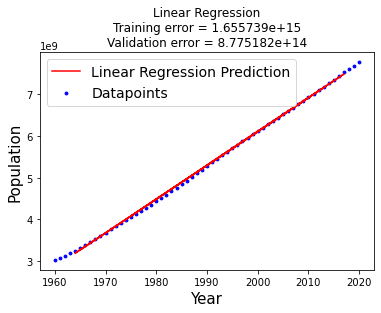

Training error:  1655738921544125.5
Validation error:  877518153423424.9


In [41]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression(fit_intercept=True) 
lin_regr.fit(X_train, y_train)  

y_pred_train = lin_regr.predict(X_train)
train_error = mean_squared_error(y_train, y_pred_train)

y_pred_val = lin_regr.predict(X_val)
val_error = mean_squared_error(y_val, y_pred_val)

plt.plot(X_val, y_pred_val, color='r', label='Linear Regression Prediction')  
plt.scatter(X, y, color='b', s=8, label='Datapoints') 

plt.xlabel('Year',size=15) # define label for the horizontal axis 
plt.ylabel('Population',size=15) # define label for the vertical axis 

plt.title(f'Linear Regression\nTraining error = {train_error:.7}\nValidation error = {val_error:.7}')    
plt.legend(loc='best',fontsize=14) # define the location of the legend  

plt.show()  # display the plot on the screen 

print("Training error: ",train_error)
print("Validation error: ",val_error)

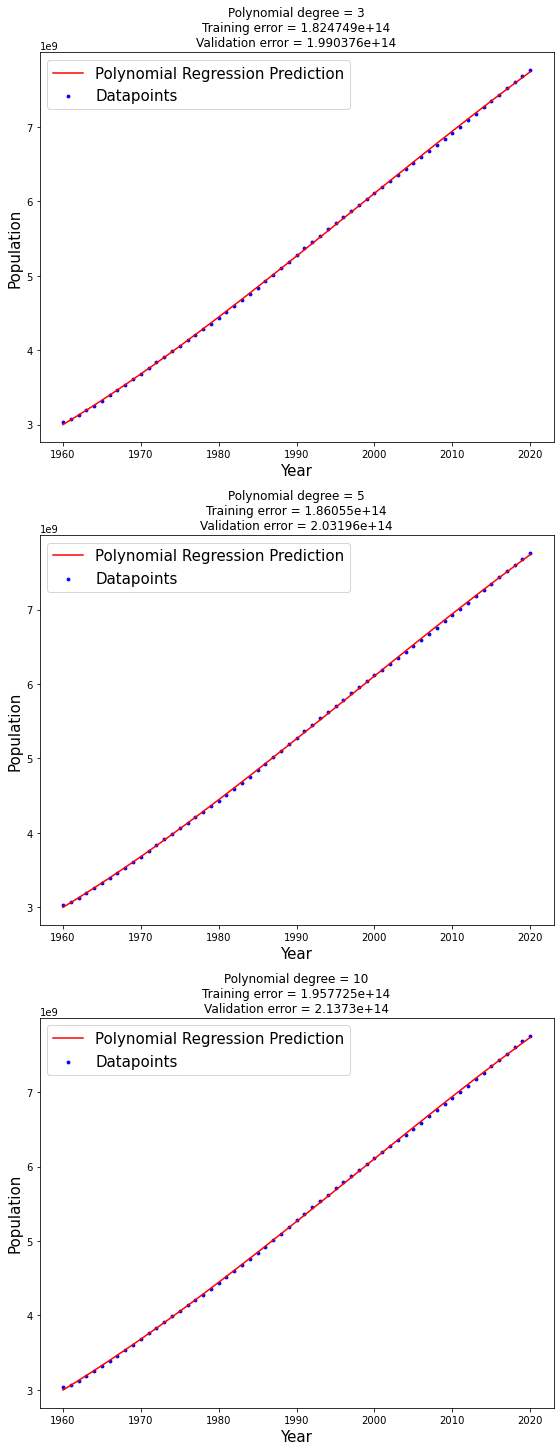

Training error:  [182474878812554.94, 186054995662141.12, 195772533400225.72]
Validation error:  [199037570184477.2, 203196011663465.8, 213729988467447.22]


In [42]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [3, 5, 10] 

tr_errors = []          
val_errors = []

plt.figure(figsize=(8, 20))   
for i, degree in enumerate(degrees):   
    plt.subplot(len(degrees), 1, i + 1)    
    
    lin_regr2 = LinearRegression(fit_intercept=True) 
 
    poly = PolynomialFeatures(degree=degree)    # generate polynomial features
    
    X_train_poly = poly.fit_transform(X_train)    # fit and transform the features
    lin_regr2.fit(X_train_poly, y_train)    
    y_pred_train2 = lin_regr2.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train2)
    
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val2 = lin_regr2.predict(X_val_poly)
    vl_error = mean_squared_error(y_val, y_pred_val2)
    
    tr_errors.append(tr_error)
    val_errors.append(vl_error)
    
    plt.tight_layout()
    
    plt.plot(X, lin_regr2.predict(poly.transform(X.reshape(-1, 1))), color='r', label='Polynomial Regression Prediction')  
    plt.scatter(X, y, color='b', s=8, label='Datapoints') 

    plt.xlabel('Year',size=15) # define label for the horizontal axis 
    plt.ylabel('Population',size=15) # define label for the vertical axis 

    plt.title(f'Polynomial degree = {degree}\nTraining error = {tr_error:.7}\nValidation error = {vl_error:.7}')    
    plt.legend(loc='best',fontsize=15) # define the location of the legend  

plt.show()  # display the plot on the screen 

print("Training error: ",tr_errors)
print("Validation error: ",val_errors)

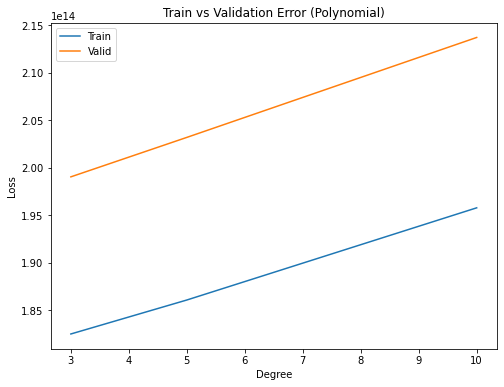

In [43]:
plt.figure(figsize=(8, 6))

plt.plot(degrees, tr_errors, label = 'Train')
plt.plot(degrees, val_errors,label = 'Valid')

plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs Validation Error (Polynomial)')
plt.show()

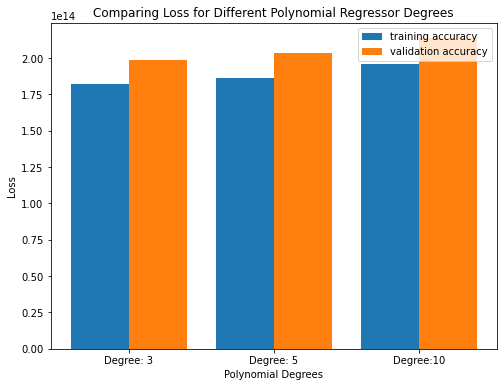

In [44]:
plt.figure(figsize=(8, 6))

X = ['Degree: 3','Degree: 5','Degree:10']
y1 = [tr_errors[0],tr_errors[1],tr_errors[2]]
y2 = [val_errors[0],val_errors[1],val_errors[2]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = 'training accuracy')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'validation accuracy')
  
plt.xticks(X_axis, X)
plt.xlabel("Polynomial Degrees")
plt.ylabel("Loss")
plt.title("Comparing Loss for Different Polynomial Regressor Degrees")
plt.legend()
plt.show()

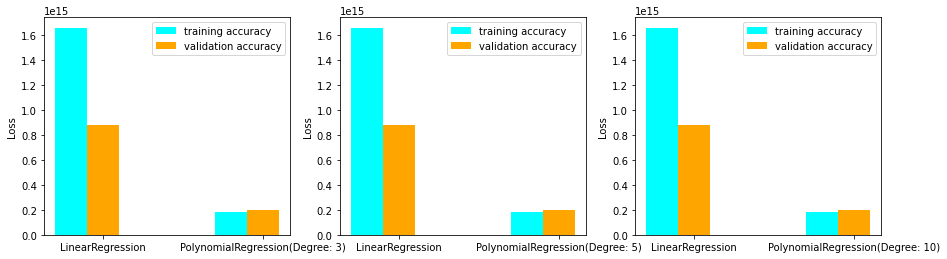

In [45]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
x = np.arange(2)
y1 = [train_error, tr_errors[0]]
y2 = [val_error, val_errors[0]]

y3 = [train_error, tr_errors[0]]
y4 = [val_error, val_errors[0]]

y5 = [train_error, tr_errors[0]]
y6 = [val_error, val_errors[0]]
width = 0.2

axes[0].bar(x-0.2, y1, width, color='cyan')
axes[0].bar(x, y2, width, color='orange')
axes[0].set_xticks(x)
axes[0].set_xticklabels(["LinearRegression","PolynomialRegression(Degree: 3)"])
axes[0].set_ylabel("Loss")
axes[0].legend(["training accuracy", "validation accuracy"])

axes[1].bar(x-0.2, y3, width, color='cyan')
axes[1].bar(x, y4, width, color='orange')
axes[1].set_xticks(x)
axes[1].set_xticklabels(["LinearRegression","PolynomialRegression(Degree: 5)"])
axes[1].set_ylabel("Loss")
axes[1].legend(["training accuracy", "validation accuracy"])

axes[2].bar(x-0.2, y5, width, color='cyan')
axes[2].bar(x, y6, width, color='orange')
axes[2].set_xticks(x)
axes[2].set_xticklabels(["LinearRegression","PolynomialRegression(Degree: 10)"])
axes[2].set_ylabel("Loss")
axes[2].legend(["training accuracy", "validation accuracy"])

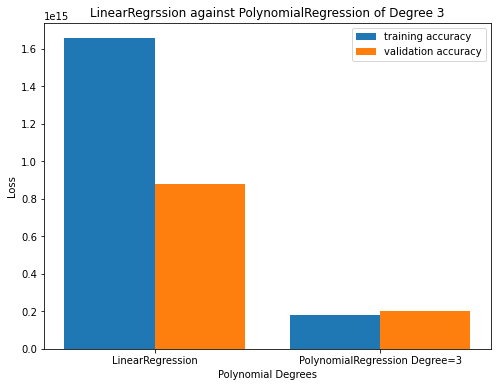

In [46]:
plt.figure(figsize=(8, 6))

X = ['LinearRegression','PolynomialRegression Degree=3']
y1 = [train_error, tr_errors[0]]
y2 = [val_error, val_errors[0]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = 'training accuracy')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'validation accuracy')
  
plt.xticks(X_axis, X)
plt.xlabel("Polynomial Degrees")
plt.ylabel("Loss")
plt.title("LinearRegrssion against PolynomialRegression of Degree 3")
plt.legend()
plt.show()

In [47]:
lin_regr3 = LinearRegression(fit_intercept=False)
 
poly2 = PolynomialFeatures(degree=5)
X_train_poly = poly2.fit_transform(X_train) 
lin_regr3.fit(X_train_poly, y_train)

y_pred_test = lin_regr3.predict(poly2.fit_transform(X_test))
test_error = mean_squared_error(y_pred_test, y_test)

print("The test error is: ",test_error)

The test error is:  792354426379851.6
